<a href="https://colab.research.google.com/github/arunt-sjsu/deep_learning/blob/main/Assignment%204%20-%20MNIST%20classifier%20with%20various%20training%20knobs%20with%20numpy%20and%20keras/MNIST_Classifier_Using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape, test_images.shape


((60000, 28, 28), (10000, 28, 28))

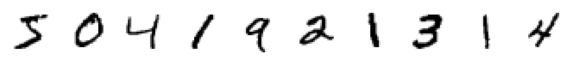

In [4]:
_, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)


In [5]:
train_labels[0:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [10]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images= train_images.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

test_images = test_images.reshape((10000, 28, 28, 1))
test_images= test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))


Epoch 1/5
782/782 [==============================] - 49s 61ms/step - loss: 0.4496 - accuracy: 0.8556 - val_loss: 0.0560 - val_accuracy: 0.9840
Epoch 2/5
782/782 [==============================] - 48s 61ms/step - loss: 0.0526 - accuracy: 0.9826 - val_loss: 0.0607 - val_accuracy: 0.9828
Epoch 3/5
782/782 [==============================] - 47s 61ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0367 - val_accuracy: 0.9898
Epoch 4/5
782/782 [==============================] - 47s 60ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0410 - val_accuracy: 0.9894
Epoch 5/5
782/782 [==============================] - 47s 61ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.0329 - val_accuracy: 0.9914


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)


313/313 [==============================] - 3s 10ms/step - loss: 0.0253 - accuracy: 0.9927
Accuracy: 0.9926999807357788
Loss:  0.025250203907489777


{'loss': [0.19703532755374908, 0.05025968328118324, 0.03354446217417717, 0.026256464421749115, 0.019739771261811256], 'accuracy': [0.938539981842041, 0.9835399985313416, 0.9897599816322327, 0.9917399883270264, 0.9934999942779541], 'val_loss': [0.056023236364126205, 0.060728803277015686, 0.03668426349759102, 0.04101897403597832, 0.032927460968494415], 'val_accuracy': [0.984000027179718, 0.9828000068664551, 0.989799976348877, 0.9894000291824341, 0.9914000034332275]}


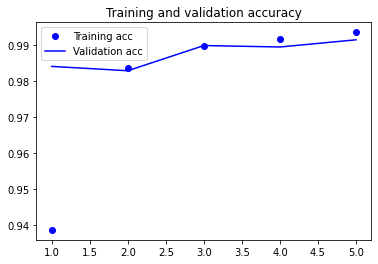

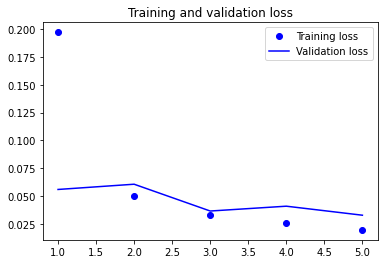

In [16]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

print(history.history)
plot_accuracy_and_loss(history)


In [17]:
preds = model.predict(test_images)


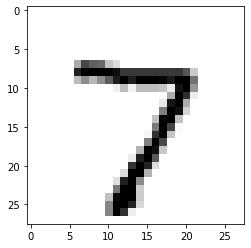

In [18]:
# reload the test images so it will be in a format imshow() will understand
(_, _), (test_images, _) = mnist.load_data()

plt.imshow(test_images[0], cmap=plt.cm.binary)


In [19]:
print(preds[0])


[3.2998701e-13 8.1822216e-10 3.0919458e-09 7.1257964e-09 1.4703551e-11
 1.1676039e-10 3.7099663e-17 1.0000000e+00 9.9650732e-10 4.9420397e-08]


In [20]:
np.argmax(preds[0])


7